#### This project uses linear Regression, Ridge, Lasso and Elastic-Net to predict the chances of people being admitted to university. Input data includes student's score and other attributes... . at the end, models are evaluated by different metrics like : MAE, MSE, R2-score, Max-Error

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# load data:

In [3]:
data = pd.read_csv('Admission_Predict_Ver1.1.csv')
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
data.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
data.nunique() / data.shape[0] *100

Serial No.           100.0
GRE Score              9.8
TOEFL Score            5.8
University Rating      1.0
SOP                    1.8
LOR                    1.8
CGPA                  36.8
Research               0.4
Chance of Admit       12.2
dtype: float64

In [7]:
X = data.drop(columns=['Serial No.','Chance of Admit '])
Y = data['Chance of Admit ']

In [8]:
X_train , X_test , y_train , y_test = train_test_split(X , Y , test_size= 0.3)
print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape)

(350, 7) (350,)
(150, 7) (150,)


# Regression


## Linear Models:
$$\hat{y}(w, x) = w_0 + w_1 x_1 + \cdots + w_p x_p$$

In [9]:
lr1= LinearRegression(fit_intercept= False)
lr1.fit(X_train,y_train)
y_pred1 = lr1.predict(X_test)
print(lr1.coef_ ,'\n')
print(lr1.intercept_)

[-0.00280929  0.00338525  0.0154335   0.0105846   0.01477822  0.1253834
  0.06686069] 

0.0


In [10]:
lr2 = LinearRegression(fit_intercept= True)
lr2.fit(X_train,y_train)
y_pred2 = lr2.predict(X_test)
print(lr2.coef_ ,'\n')
print(lr2.intercept_)

[0.00171333 0.00271316 0.00561998 0.00395478 0.01258884 0.11481933
 0.03578688] 

-1.1922007852452308


In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

## Polynomial Model:

In [12]:
my_steps = [('polynomial features', PolynomialFeatures(degree=2)),
           ('linear regression', LinearRegression(fit_intercept=False))]
lr3 = Pipeline(steps=my_steps)
lr3.fit(X_train,y_train)
y_pred3 = lr3.predict(X_test)

# Visualization:

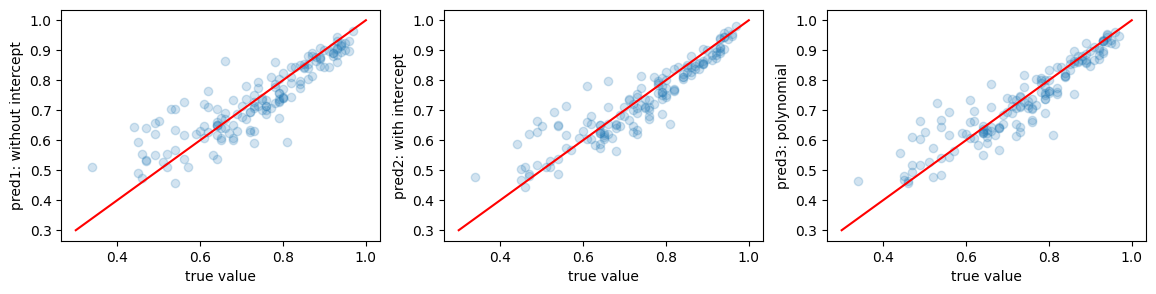

In [13]:
plt.figure(figsize=(14,3))

plt.subplot(131)
plt.scatter(y_test, y_pred1, alpha= 0.2)
plt.plot(np.linspace(0.3,1,200),np.linspace(0.3,1,200), c = 'r');
plt.xlabel('true value')
plt.ylabel('pred1: without intercept')

plt.subplot(132)
plt.scatter(y_test, y_pred2 , alpha= 0.2)
plt.plot(np.linspace(0.3,1,200),np.linspace(0.3,1,200),c ='r')
plt.xlabel('true value')
plt.ylabel('pred2: with intercept')

plt.subplot(133)
plt.scatter(y_test, y_pred3 , alpha= 0.2)
plt.plot(np.linspace(0.3,1,200),np.linspace(0.3,1,200),c ='r')
plt.xlabel('true value')
plt.ylabel('pred3: polynomial')

plt.show()

## Linear Ridge:
$$\min_{\omega} \| X\omega - y\|_2^2 + \alpha \|\omega\|^2_2$$

In [19]:
from sklearn.linear_model import Ridge
steps =[('polynomial', PolynomialFeatures(degree=2)),
        ('linear Ridge', Ridge(alpha= 5 ,fit_intercept= False))]
lr4 = Pipeline(steps= steps)
lr4.fit(X_train, y_train)
y_pred4 = lr4.predict(X_test)

## Linear Lasso:
$$\min_{\omega} \frac{1}{n_{sample}}\| X\omega - y\|_2^2 + \alpha \|\omega\|_1$$

In [20]:
from sklearn.linear_model import Lasso
steps =[('polynomial', PolynomialFeatures(degree=2)),
        ('linear Ridge', Lasso(alpha= 5 ,fit_intercept= False))]
lr5 = Pipeline(steps= steps)
lr5.fit(X_train, y_train)
y_pred5 = lr5.predict(X_test)

C:\Users\ASUS\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.122e-01, tolerance: 1.863e-02
  model = cd_fast.enet_coordinate_descent(


## Elastic-Net Model
$$\min_{w} \frac{1}{2 n_{Samples}} \|Xw - y\|^2_2 + \alpha \rho\|w\|_1 + \frac{\alpha(1-\rho)}{2}\|w\|_2^2, ~~~~0\leq \rho \leq 1$$